In [1]:
# Import Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random 
import scipy.stats as stats

In [2]:
random.seed(42)

In [3]:
# Import clean data

file_path = "Output_data/spotify_clean.csv"

spotify_df = pd.read_csv(file_path, low_memory=False)

# Let the data speak to you 
                                        - Jeff , UTSA Bootcamp

In [4]:
# Look at data frame summary

spotify_df.head()

,year,artists,acousticness,danceability,energy,instrumentalness,loudness,popularity,speechiness,valence
0,1920,Mamie Smith,0.991000,0.598,0.224,0.000522,-12.628,12,0.0936,0.6340
1,1920,Screamin Jay Hawkins,0.643000,0.852,0.517,0.026400,-7.261,7,0.0534,0.9500
2,1920,Mamie Smith,0.993000,0.647,0.186,0.000018,-12.098,4,0.1740,0.6890
3,1920,Oscar Velazquez,0.000173,0.730,0.798,0.801000,-7.311,17,0.0425,0.0422
4,1920,Mixe,0.295000,0.704,0.707,0.000246,-6.036,2,0.0768,0.2990


## How has music chaged over time .. lets see..

In [5]:
# Create bins for decades

bins  = [1920,1929,1939,1949,1959,1969,1979,1989,1999,2009,2019,2030]
bin_group = ['1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','2020 +']
# Sort df by bins

spotify_copy = spotify_df
spotify_copy['decade'] = pd.cut(spotify_copy['year'],bins,labels=bin_group,include_lowest=True)
spotify_copy = spotify_copy[['decade', 'artists', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'loudness', 'popularity', 'speechiness',
       'valence']]
song_count = spotify_copy.groupby('decade')['artists'].count()
song_count

decade
1920-1929     5631
1930-1939    10760
1940-1949    15491
1950-1959    20000
1960-1969    19610
1970-1979    20108
1980-1989    20074
1990-1999    20328
2000-2009    13779
2010-2019    22441
2020 +        6132
Name: artists, dtype: int64

In [6]:
# Generate a grouped dataframe to show average music characteristics

spotify_line = spotify_copy[['decade','acousticness','danceability','energy','instrumentalness','speechiness','valence']]
song_line = spotify_line.groupby('decade').mean()

# Generate a line chart showing music characteristics change over decades
x_labels = ['1920s','1930s','1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020+']
#x_axis = x_labels
y_labels = ['acousticness','danceability','energy','instrumentalness','speechiness','valence']
y_line = song_line[['acousticness','danceability','energy','instrumentalness','speechiness','valence']]


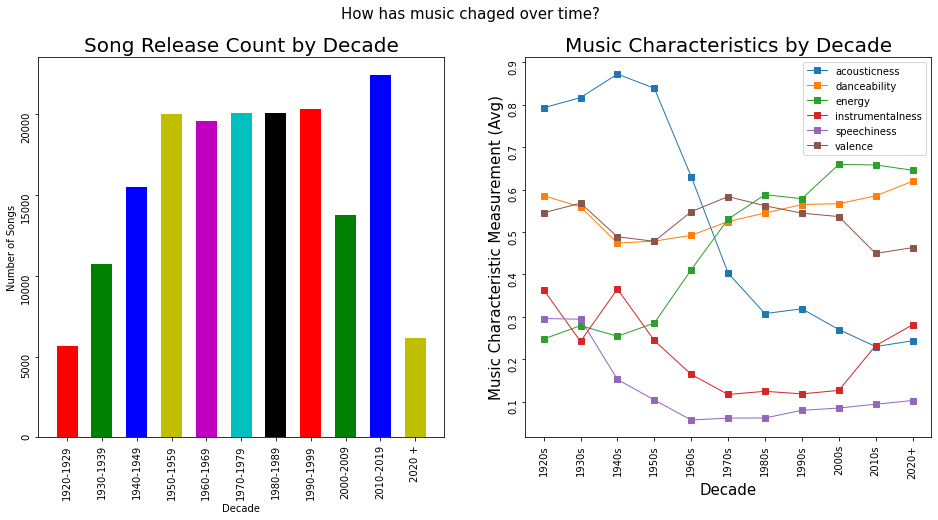

In [13]:
# Generate a bar plot showing total songs released by decade

x_axis = song_count.index
y_axis = song_count

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("XYZ")
fig.set_figheight(7)
fig.set_figwidth(16)

fig.suptitle('How has music chaged over time?', fontsize=15)

ax1.bar(x_axis, y_axis,width=.6,color=['r', 'g', 'b', 'y', 'm', 'c', 'k'] )
ax1.set_title('Song Release Count by Decade',fontsize=20)
ax1.set_ylabel('Number of Songs')
ax1.set_xlabel('Decade')
ax1.tick_params(labelrotation=90)

#Subplot 2

ax2.plot(x_labels, y_line, marker='s',linewidth=1)
ax2.set_title('Music Characteristics by Decade',fontsize=20)
ax2.set_ylabel('Music Characteristic Measurement (Avg)',fontsize=15)
ax2.set_xlabel('Decade',fontsize=15)
ax2.legend(y_labels,loc ='upper right')
ax2.tick_params(labelrotation=90)
plt.show()

In [ ]:
Q

##### We can see that year 2020 had the most No. releases 

### Question 1 : Does musical charecteristic Intrumentalness and danceability influence relase count?
#### Null Hypothesis - Increase in Instrumentalness and danceability doesnot increase the release count.
#### Alternate Hypothesis -  Increase in Instrumentalness and danceability will increase the release count.

### Let us compare  intrumantalness and Danceability of the decade 2000 to intrumentalness ,danceability of the decade 2010

In [8]:
#Fetching 'Instrumnetalness' of the decade 2000 and 2010
population1 = spotify_df.loc[(spotify_df["year"]>=2000) & (spotify_df["year"]<=2009) ,['instrumentalness','danceability']]
population2 = spotify_df.loc[(spotify_df["year"]>=2010) & (spotify_df["year"]<=2019) ,['instrumentalness','danceability' ]]


#### Using Independent T test to find statistical difference in instrumentalness

In [9]:
population1.instrumentalness.mean()

0.12681838743014734

In [10]:
population2.instrumentalness.mean()

0.23235573621229003

In [12]:
# Calculate Independent (Two Sample) t-test
stats.ttest_ind(population1.instrumentalness, population2.instrumentalness, equal_var=False)

Ttest_indResult(statistic=-31.10504780888943, pvalue=1.7704928490085738e-209)

### There is no statistically significant difference between instrumntalness in the 2 decades
### Increase in instrumntalness may or may not influence increase the release count

# Question 2: How has Rolling Stones Music Style Evolved Over Time?

In [ ]:
# Create data frame sorted by the artist, The Rolling Stones
spotify_stones = spotify_copy[spotify_copy['artists']=='The Rolling Stones']
spotify_stones.head()

In [ ]:
stones_count = spotify_stones.groupby('decade')['artists'].count()
stones_values = stones_count.values[4:]
stones_index = stones_count.index[4:] 
stones_index

In [ ]:
x_axis = stones_index
y_axis = stones_values
plt.figure(figsize=(15,8))
plt.bar(x_axis, y_axis,width=.6,color='rgbymck')
plt.title('The Rolling Stones Song Release Count by Decade')
plt.ylabel('Number of Songs')
plt.xlabel('Decade')
plt.show()

In [ ]:
# Generate a grouped dataframe to show average music characteristics

stones_line = spotify_stones[['decade','acousticness','danceability','energy','instrumentalness','speechiness','valence']]
stones_line = stones_line.groupby('decade').mean()
#decade_list = ['1920-1929','1930-1939','1940-1949','1950-1959']
#stones_line = stones_line.loc['2010-2019',:].fillna(0)
#stones_line[stones_line.index!=decade_list]
#stones_line = stones_line.fillna(0)
stones_line = stones_line.dropna()
x_values = stones_line.index
y_values = stones_line.values
stones_line

In [ ]:
# Generate a line chart showing music characteristics change over decades
x_labels = ['1960s','1970s','1980s','1990s','2000s','2010s','2020+']
y_labels = ['acousticness','danceability','energy','instrumentalness','speechiness','valence']
#y_axis = song_line[['acousticness','danceability','energy','instrumentalness','speechiness','valence']]
plt.figure(figsize=(15,8))
plt.plot(x_values, y_values, marker='s',linewidth=2)
plt.title('Music Characteristics by Decade',fontsize=20)
plt.ylabel('Music Characteristic Measurement (Avg)',fontsize=15)
plt.xlabel('Decade',fontsize=15)
plt.legend(y_labels)
plt.show()